<a href="https://colab.research.google.com/github/VaninaBlas/Diamantes/blob/main/Proyecto_diamantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediccion precio de un diamante

Este Proyecto se va a desarrollar dentro de estas etapas:

- Exploración del Dataset
- Limpieza (seleccionar columnas necesarios, corregir errores, datos nulos y transformar las variables para que todas sean numéricas)
- Visualizaciones de los datos

- Dividir los datos en variable a predecir y variables predictoras
- Dividir los datos en entrenamiento y testeo
- Entrenamiento de **tres modelos de aprendizaje automático supervisado**
- Medir su performance y compararlos



Dataset: [Diamonds](https://www.canva.com/design/DAF1ZcMebR0/fLFC_HP6g2se5gcOvRC-Dw/edit?utm_content=DAF1ZcMebR0&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

Esta es una presentacion del proyecto para entender de manera mas amigable: [Proyecto Diamantes](https://www.canva.com/design/DAF1ZcMebR0/fLFC_HP6g2se5gcOvRC-Dw/edit?utm_content=DAF1ZcMebR0&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

### Definición del problema



**¿Cuál será el precio de un diamante en base a determinadas características?**

### Búsqueda de datos



Vamos a usar el dataset diamantes que sacamos de kaggle, hicimos una busqueda encontrando el que mejor se adapta, elegimos estos datos porque nos parecian los mejores para predecir el precio de un diamante. Estas son las variables:


*   **carat**: peso del diamante, un equilate equivale a 0,2 gramos
*   **clarity**: es la claridad del diamante. Los diamantes suelen contener imperfecciones como grietas o depósitos minerales. Cuanto menos notables sean las imperfecciones de un diamante, mejor será su claridad. La claridad contiene 8 niveles ordenados, desde “I1” (el peor) hasta “IF” (el mejor).
*   **color**: se refiere al color del diamante. Los diamantes incoloros se consideran mejores que los diamantes con un tinte amarillo. Hay de 7 colores diferentes, representados por diferentes letras. Los diamantes “D” - “F” se consideran incoloros, mientras que los diamantes “G” - “J” tienen un color muy tenue.
*  **cut**: se refiere a cómo se le da forma a un diamante en bruto para convertirlo en un diamante terminado. Mejores cortes crean diamantes más simétricos y luminosos. El corte tiene 5 niveles ordenados:“Fair,” “Good,” “Very Good,” “Premium,” “Ideal.”
*  **x, y, z, depth, y table**:son varias medidas del tamaño de un diamante, en milímetros.
* **price**: el precio del diamante, variable a predecir





In [ ]:
#importamos las librerias que utilizaremos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Archivo desde computadora

from google.colab import files
import io

filesUploaded = files.upload()

Saving diamonds.csv to diamonds (1).csv


In [ ]:
data = pd.read_csv("diamonds.csv", sep=",")

In [ ]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Exploración del dataset

In [ ]:
#Ver los primeros 5 registros del dataset
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#Tamaño del dataset
data.shape

(53940, 10)

In [ ]:
#Tipos de datos
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
#Nombres de las columnas
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
data.corr()

<ipython-input-14-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [ ]:
data["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [ ]:
data["price"].mean()

3932.799721913237

In [ ]:
data["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

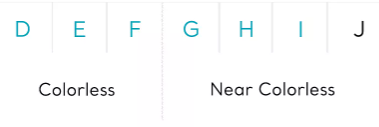


De la D a la F son sin color, del G al J son casi sin color, color tenue

In [ ]:
data["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Orden de claridad:



1.   IF
2.   VVS1
3.   VVS2
4.   VS1
5.   VS2
6.   SI1
7.   SI2
8.   I1





Del 1 al 5 es limpio a la vista, del 6 al 8 no es limpio a la vista

### Visualizaciones de los datos

In [ ]:
data["price"].min()

326

In [ ]:
data["price"].max()

18823

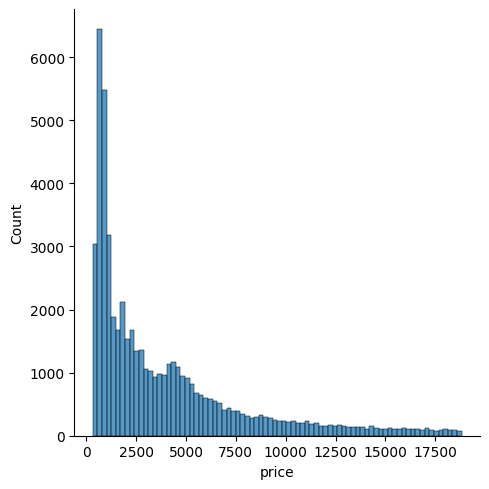

In [ ]:
sns.displot(data["price"])


Se observa que el precio de los diamantes está en un rango entre 326 y 18823

Vemos que la grafica es descendente

### Limpieza

In [ ]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Vemos que no hay valores nulos, por lo cual podemos continuar con la parte de dummies

#Convertir variables categóricas en variables numéricas

In [ ]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Viendo esto podemos ver que algo tenemos que hacer con las columnas: cut, color y clarity ya que son object

In [ ]:
data=pd.get_dummies(data, drop_first=True)

Con esto hacemos que todas las variables categoricas se vuelvan dummies sin tener que hacer una por una

In [ ]:
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
data.columns #Muestra todas las columnas del dataset

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [ ]:
data.dtypes

carat            float64
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

Y ahora ya podemos dividir los datos en variables a predecir y variables predictoras

#Dividir los datos en variable a predecir y variables predictoras

In [ ]:
# Generamos X e y

X = data.drop(columns = "price")   #variables predictora
y = data["price"]   #variable a predecir

#Dividir los datos en entrenamiento y testeo

In [ ]:
# Dividimos datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)  #por default 25% de test


In [ ]:
X_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
40412,0.55,61.7,55.0,5.29,5.31,3.27,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
9339,0.94,62.4,56.0,6.27,6.24,3.90,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
10739,0.33,60.0,59.0,4.49,4.47,2.69,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
34891,0.31,59.4,56.0,4.45,4.40,2.63,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
27286,2.01,62.8,59.0,7.99,8.04,5.03,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23452,1.50,60.7,62.0,7.30,7.33,4.44,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
23775,1.51,61.9,57.0,7.35,7.42,4.57,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
37135,0.42,60.9,56.0,4.87,4.89,2.97,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
27098,2.05,59.7,59.0,8.39,8.27,4.97,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y_train

40412     1134
9339      4580
10739      594
34891      879
27286    17759
         ...  
23452    11442
23775    11834
37135      971
27098    17237
48483     1980
Name: price, Length: 40455, dtype: int64

In [ ]:
X_test

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
20244,1.52,62.1,66.0,7.33,7.13,4.50,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
45013,0.54,62.0,58.0,5.21,5.18,3.22,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
53351,0.70,62.0,60.0,5.70,5.59,3.50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
47212,0.59,62.2,58.0,5.35,5.39,3.34,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1460,0.86,61.8,58.0,6.12,6.15,3.79,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25096,1.51,62.4,58.0,7.26,7.33,4.55,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9778,1.00,63.1,57.0,6.32,6.39,4.01,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
51623,0.70,59.6,63.0,5.72,5.65,3.39,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
45757,0.58,62.2,57.0,5.37,5.33,3.33,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
y_test

20244     8674
45013     1637
53351     2657
47212     1838
1460      2980
         ...  
25096    13623
9778      4664
51623     2396
45757     1705
50228     2231
Name: price, Length: 13485, dtype: int64

In [ ]:
print("El tamaño de X_train es: ", X_train.shape)
print("El tamaño de X_test es: ",X_test.shape)
print("El tamaño de y_train es: ",y_train.shape)
print("El tamaño de y_test es: ",y_test.shape)

El tamaño de X_train es:  (40455, 23)
El tamaño de X_test es:  (13485, 23)
El tamaño de y_train es:  (40455,)
El tamaño de y_test es:  (13485,)


#Entrenamiento

##KNN

In [ ]:
# Importamos el modelo que utilizaremos. KNN:

from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Instanciamos el modelo que utilizaremos KKN con el hiperárametro de cantidad de vecinos, en este caso 8

knn_k8 = KNeighborsRegressor(n_neighbors = 8)

In [ ]:
knn_k8

KNeighborsRegressor(n_neighbors=8)

In [ ]:
# Entrenamos el modelo

knn_k8.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

##### Evaluación de datos de train

In [ ]:
from sklearn.metrics import r2_score
y_pred_knn8_train= knn_k8.predict(X_train)
r2_train_knn8 = r2_score(y_train, y_pred_knn8_train)
r2_train_knn8

0.9507990948703336

##### Probar el modelo y medir la performance

In [ ]:
# Probamos nuestro modelo con los datos de test

y_pred_data_knn8 = knn_k8.predict(X_test)
y_pred_data_knn8

array([6634.875, 1453.125, 2860.75 , ..., 2389.375, 1899.875, 2422.625])

In [ ]:
# La métrica que se utiliza para medir la performance de un modelo de regresión lineal es R2
r2_knn = r2_score(y_test,y_pred_data_knn8)
r2_knn

#Cuanto más cerca de 1 mejor el modelo

0.9343853906491799

#Regresion Lineal

In [ ]:
# Importamos el modelo que utilizaremos. Regresión lineal:

from sklearn.linear_model import LinearRegression

In [ ]:
# Definimos un objeto con el modelo importado, en este caso los hiperparametros son por default por lo que el parentesis está vacio

modelo_rl = LinearRegression()

In [ ]:
# Realizamos el entrenamiento del modelo con el método fit y los datos de entrenamiento

modelo_rl.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Coeficiente (la pendiente de la recta)

modelo_rl.coef_


array([ 1.11032433e+04, -6.03186855e+01, -3.07448184e+01, -9.22041728e+02,
        5.75298309e-01, -6.29806564e+01,  6.41477718e+02,  8.66939046e+02,
        8.02632807e+02,  7.72017136e+02, -2.11446490e+02, -2.60181664e+02,
       -4.77241287e+02, -9.79435887e+02, -1.44568473e+03, -2.32071663e+03,
        5.42196209e+03,  3.70902347e+03,  2.75744676e+03,  4.62982528e+03,
        4.32943759e+03,  5.05171077e+03,  5.01557344e+03])

In [ ]:
# Intercepto (el punto de comienzo de la recta en el eje y)

modelo_rl.intercept_

1843.6433610079403

##### Evaluación de datos de train

In [ ]:
y_pred_rl_train= modelo_rl.predict(X_train)
r2_train_rl = r2_score(y_train, y_pred_rl_train)
r2_train_rl

0.9193208070553841

##### Probar el modelo y medir la performance

In [ ]:
# Probar el modelo con predict y los datos de test

y_pred_lineal = modelo_rl.predict(X_test)
y_pred_lineal

array([9257.74958438, 1967.61083018, 3479.23576306, ..., 2869.25791529,
       1937.00512991, 1287.32884637])

In [ ]:
r2_lineal = r2_score(y_test, y_pred_lineal)
r2_lineal

0.9210494781954062

In [ ]:
print("El R2 del modelo es", round(r2_lineal,2))

El R2 del modelo es 0.92


#Regresion Lineal sin intercepto

In [ ]:
# Al momento de instanciar el modelo se definen los hiperparámetros

modelo_rl_sin_inter = LinearRegression(fit_intercept = False)


In [ ]:
# Se entena el modelo sin intercepto (se usa x_train con el reshape ya realizado)

modelo_rl_sin_inter.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
# El coeficiente del modelo (la pendiente de la recta)

modelo_rl_sin_inter.coef_

array([ 1.10335256e+04, -4.20206600e+01, -2.16831227e+01, -8.74124297e+02,
        5.86113723e+00, -1.00864649e+02,  6.76566510e+02,  9.35431427e+02,
        8.53358068e+02,  8.21965743e+02, -2.09136499e+02, -2.58555742e+02,
       -4.76654396e+02, -9.78863603e+02, -1.44503979e+03, -2.32000540e+03,
        5.45251024e+03,  3.72833001e+03,  2.77802943e+03,  4.65323412e+03,
        4.35115184e+03,  5.07917622e+03,  5.04066812e+03])

In [ ]:
# El intercepto es 0 debido a que eso es lo que se ha definido

modelo_rl_sin_inter.intercept_

0.0

##### Evaluación de datos de train

In [ ]:
y_pred_rl_sin_train= modelo_rl_sin_inter.predict(X_train)
r2_train_rl_no_inter= r2_score(y_train, y_pred_rl_sin_train)
r2_train_rl_no_inter

0.919290465709544

##### Probar el modelo y medir la performance

In [ ]:
# Probar nuestro modelo con los datos de test

y_pred_sin_inter = modelo_rl_sin_inter.predict(X_test)

In [ ]:
# Evaluamos el modelo con distintas métricas

r2_sin_inter = r2_score(y_test, y_pred_sin_inter)
r2_sin_inter

0.9209774749942177

In [ ]:
print("El R2 del modelo sin intercepto es", round(r2_sin_inter,2))

El R2 del modelo sin intercepto es 0.92


##### Comparar la performance de ambos modelos entrenados

In [ ]:
# Es muy bueno pero levemente peor que el anterior

print("el R2 del modelo con intercepto es ", r2_lineal)
print("el R2 del modelo sin intercepto es ", r2_sin_inter)

el R2 del modelo con intercepto es  0.9210494781954062
el R2 del modelo sin intercepto es  0.9209774749942177


# Árbol de decisión

In [ ]:
# Importamos el modelo que utilizaremos: árbol de decisión

from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Instanciamos el modelo que utilizaremos con el hiperparámetro max_depth=4

arbol_depth4 = DecisionTreeRegressor(max_depth=4)

In [ ]:
# Entrenamos el modelo

arbol_depth4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
arbol_depth4.tree_.node_count

31

In [ ]:
arbol_depth4.tree_.max_depth

4

##### Evaluación de datos de train

In [ ]:
from sklearn.metrics import r2_score
y_pred_depth4_train= arbol_depth4.predict(X_train)
r2_train_arbol2 = r2_score(y_train, y_pred_depth4_train)
r2_train_arbol2

0.8944876385613247

##### Probamos y evaluamos nuestro modelo

In [ ]:
# Probamos nuestro modelo con los datos de test

y_pred_arbol = arbol_depth4.predict(X_test)
y_pred_arbol

array([7388.07406598, 1648.2870695 , 2492.43494253, ..., 2492.43494253,
       1648.2870695 , 2492.43494253])

[Text(0.5, 0.9, 'carat <= 0.995\nsquared_error = 15990421.279\nsamples = 40455\nvalue = 3938.457'),
 Text(0.25, 0.7, 'x <= 5.535\nsquared_error = 1252224.843\nsamples = 26160\nvalue = 1631.108'),
 Text(0.125, 0.5, 'x <= 4.995\nsquared_error = 276859.181\nsamples = 18728\nvalue = 1056.972'),
 Text(0.0625, 0.3, 'price <= 4.625\nsquared_error = 55845.498\nsamples = 13237\nvalue = 787.299'),
 Text(0.03125, 0.1, 'squared_error = 34688.691\nsamples = 8969\nvalue = 700.359'),
 Text(0.09375, 0.1, 'squared_error = 51042.119\nsamples = 4268\nvalue = 970.0'),
 Text(0.1875, 0.3, 'clarity_VVS1 <= 0.5\nsquared_error = 211716.74\nsamples = 5491\nvalue = 1707.066'),
 Text(0.15625, 0.1, 'squared_error = 191035.207\nsamples = 4849\nvalue = 1648.287'),
 Text(0.21875, 0.1, 'squared_error = 144734.336\nsamples = 642\nvalue = 2151.019'),
 Text(0.375, 0.5, 'carat <= 0.895\nsquared_error = 786267.107\nsamples = 7432\nvalue = 3077.881'),
 Text(0.3125, 0.3, 'x <= 5.745\nsquared_error = 410702.13\nsamples = 5383

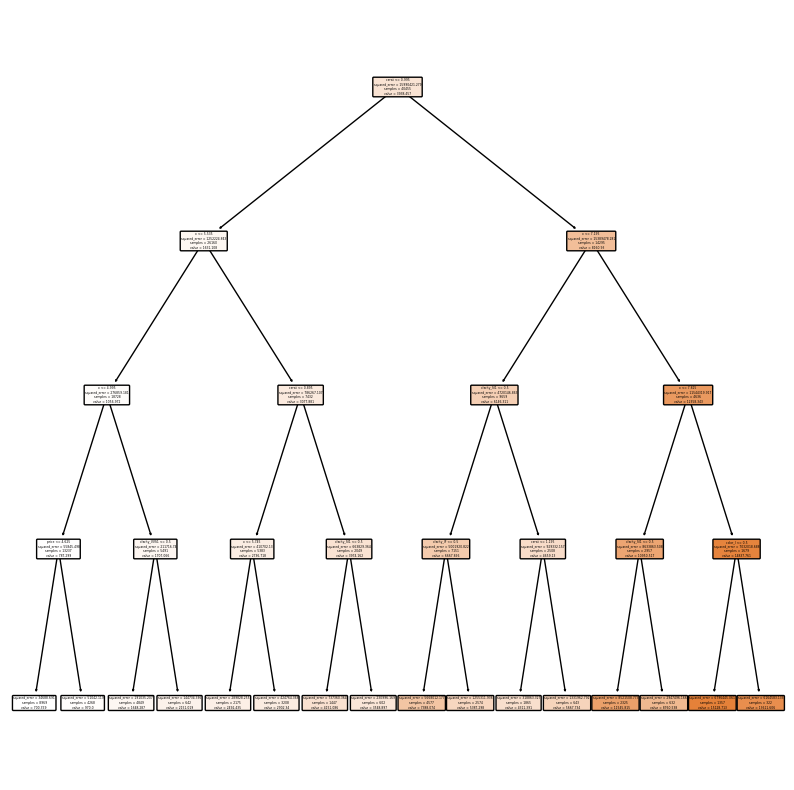

In [ ]:
# Visualizamos el modelo entrenado
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(arbol_depth4, feature_names=data.columns[:-1],filled=True,rounded=True)

In [ ]:
# Evaluamos el modelo con r2

r2_depth4 = r2_score(y_test, y_pred_arbol)
r2_depth4

0.8902448032138188

In [ ]:
print("El R2 del modelo sin intercepto es", round(r2_depth4,2))

El R2 del modelo sin intercepto es 0.89


#Conclusion

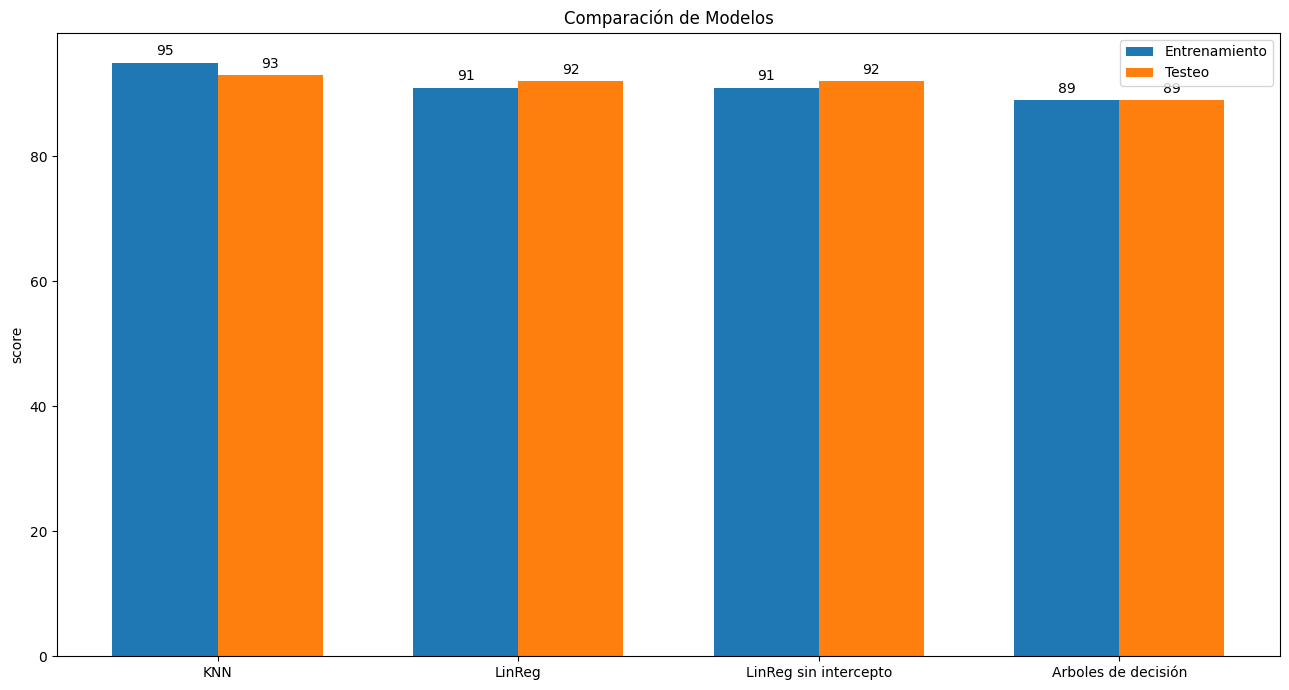

In [ ]:
import numpy as np
modelos = ['KNN', 'LinReg', 'LinReg sin intercepto', 'Arboles de decisión']
entrenamiento = [95, 91, 91, 89]
testeo = [93, 92, 92, 89]

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(modelos))
#tamaño de cada barra
width = 0.35

fig, ax = plt.subplots(figsize=(13, 7))

#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, entrenamiento, width, label='Entrenamiento')
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, testeo, width, label='Testeo')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('score')
ax.set_title('Comparación de Modelos')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig('doble_barra.png')
#Mostramos la grafica con el metodo show()
plt.show()

El mejor modelo es KNN por su aproximado a 1